In [1]:
import os
from PIL import Image
import random
from random import randint
import torch
import torchvision.transforms as transforms

In [2]:

class MaskedDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, mask_dir, transform=transform):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        images =  set([x.replace('.png', '') for x 
                       in os.listdir(img_dir) if x.endswith('.png')])
        masks = set([x.replace('.pt', '') for x 
                     in os.listdir(mask_dir) if x.endswith('.pt')])        
        self.entries = list(images & masks)
        if len(self.entries) < len(images):
            print('Missing masks', images - masks)        
        
    def __len__(self):
        return len(self.entries)
    
    def __getitem__(self, idx):
        entry_path = self.entries[idx]
        img = Image.open(os.path.join(self.img_dir, entry_path + '.png'))
        mask =  torch.load(os.path.join(self.mask_dir, entry_path + '.pt'))
        
        img_normed  = self.transform['image_normed'](img)
        img_raw =  self.transform['image_raw'](img)                
        mask_2x = self.transform['mask'](mask)
        
        res_normed =  img_normed * mask_2x
        res_raw =  img_raw * mask_2x
        return {'res_raw': res_raw, 'res_normed': res_normed}

img_dir ='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024'
mask_dir = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks'

ds = MaskedDataset(img_dir, mask_dir)    
ds[0]

NameError: name 'transform' is not defined

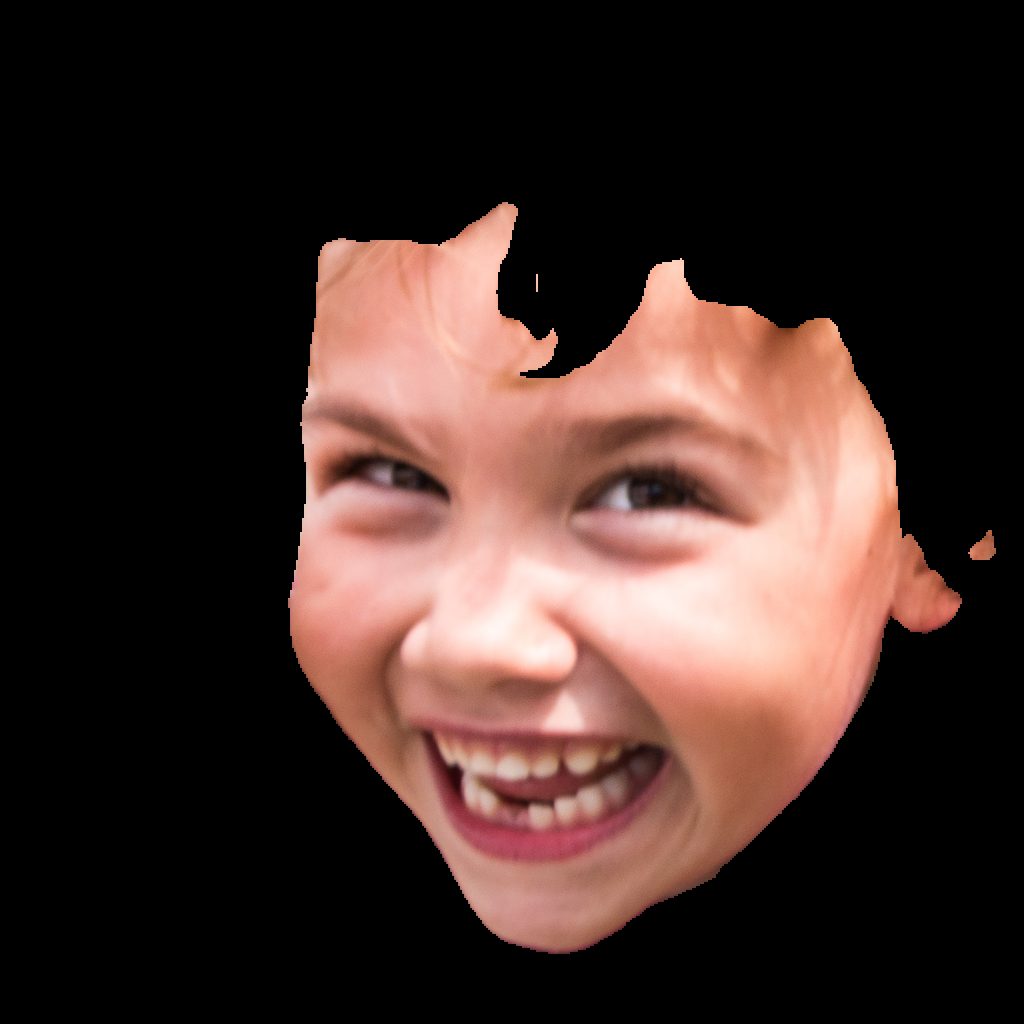

In [5]:
transforms.ToPILImage()(ds[1]['res_raw'])#.convert("RGB")

In [11]:
img_dir ='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024'
mask_dir = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks'

data = images & masks
len(data), data

(7603,
 {'24453',
  '26170',
  '27799',
  '64930',
  '28566',
  '58428',
  '02055',
  '66129',
  '38014',
  '54869',
  '17548',
  '34484',
  '11889',
  '48019',
  '30259',
  '51583',
  '42145',
  '22409',
  '08890',
  '35505',
  '56445',
  '18782',
  '40994',
  '56400',
  '68441',
  '32633',
  '13922',
  '48700',
  '10280',
  '61128',
  '65130',
  '39094',
  '52225',
  '67398',
  '51233',
  '00448',
  '19701',
  '27321',
  '24019',
  '10337',
  '43208',
  '34098',
  '58341',
  '33159',
  '36839',
  '12576',
  '51681',
  '06077',
  '52146',
  '49221',
  '61405',
  '16392',
  '62978',
  '32106',
  '09508',
  '49869',
  '19153',
  '14198',
  '18949',
  '18281',
  '27746',
  '01110',
  '35380',
  '03895',
  '39373',
  '43088',
  '15730',
  '56951',
  '64914',
  '26052',
  '05077',
  '15599',
  '31968',
  '53223',
  '38643',
  '14870',
  '61607',
  '18341',
  '15968',
  '08821',
  '17490',
  '27449',
  '10007',
  '57700',
  '56850',
  '27090',
  '57290',
  '17349',
  '45472',
  '49840',
  '

In [14]:
mask = torch.load("./res/masks/00003.pt")
mask.shape

torch.Size([1, 1, 512, 512])

In [15]:
torch.nn.functional.upsample_nearest(mask.float(), 
                                     scale_factor=2).shape

/home/bobi/.local/lib/python3.8/site-packages/torch/nn/functional.py:3208: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 1, 1024, 1024])

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [25]:
mask_2x = transforms.Lambda(lambda x: 
  torch.nn.functional.interpolate(x.float(), scale_factor=2, mode='nearest').squeeze(0))(mask)
mask_2x.shape

torch.Size([1, 1024, 1024])

In [9]:
transforms.RandomCrop(128)(torch.rand(1, 1, 256, 256)).shape

torch.Size([1, 1, 128, 128])

In [21]:
from src.config import get_parser

config = get_parser().parse_args(args=[])
config

Namespace(D_act_name='Swish', D_filters=[3, 32, 64], D_num_outcomes=32, D_use_adaptive_reparam=True, D_use_spectral_norm=False, Dsteps=3, G_noise_amp=0.003, Gsteps=3, alpha=10, backbone='vgg11', beta1=0.5, blueprint='./data/blueprint127.npz', data_blueprint='./data/blueprint127.npz', data_image_dir='/home/bobi/Desktop/face-parsing.PyTorch/res/masks', data_image_resized=256, data_image_size=1024, data_mask_dir='/home/bobi/Desktop/db/ffhq-dataset/images1024x1024', data_mask_size=512, data_patch_size=128, dlatent_size=128, gamma=0.1, in_channel=3, ker_size=3, lambda_grad=0.1, lights_location=[0.0, -1.0, 3.0], lr_d=0.0005, lr_g=0.0005, manualSeed=None, max_size=250, min_nfc=32, min_size=25, nc_im=3, nc_z=3, netD='', netG='', nfc=32, niter=2000, noise_amp=0.1, not_cuda=0, num_layer=5, out='Output', out_channel=32, padd_size=1, raster_image_size=128, raster_points_per_pixel=4, raster_radius=0.006, scale_factor=0.75, stride=1, viewpoint_azimuth=0.0, viewpoint_distance=2.0, viewpoint_elevation

In [8]:
transform = {    
    "image_normed": transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        transforms.Grayscale(),
    ]),
    "mask": transforms.Lambda(lambda x: 
        torch.nn.functional.interpolate(x.float(), size=config.data_image_size, 
                                        mode='nearest').squeeze(0)),    
    "result": transforms.Compose([
        transforms.Resize(config.data_image_resized),
        transforms.RandomCrop(config.data_patch_size),
    ]),
}

img_path = '/home/bobi/Desktop/db/ffhq-dataset/images1024x1024/00372.png'
mask_path = '/home/bobi/Desktop/face-parsing.PyTorch/res/masks/00003.pt'
img = Image.open(img_path)
mask =  torch.load(mask_path)
        
def get_patch(img, mask):
    img_normed  = transform['image_normed'](img)
    mask_resized = transform['mask'](mask)
    res_masked =  img_normed * mask_resized
    res = transform['result'](res_masked)
    return res

patch = get_patch(img, mask)
patch.shape

torch.Size([1, 128, 128])

In [29]:
from random import randint
import numpy as np

class MaskedDataset(torch.utils.data.Dataset):
    def __init__(self, config):
        self.patch_size = config.data_patch_size
        self.img_dir = config.data_image_dir
        self.mask_dir = config.data_mask_dir        
        images =  set([x.replace('.png', '') for x 
                       in os.listdir(self.img_dir) if x.endswith('.png')])
        masks = set([x.replace('.pt', '') for x 
                     in os.listdir(self.mask_dir ) if x.endswith('.pt')])        
        self.entries = list(images & masks)
        if len(self.entries) < len(images):
            print('Missing masks', images - masks)
            
        self.transform = {    
            "image_normed": transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                transforms.Grayscale(),
            ]),
            "mask": transforms.Lambda(lambda x: 
                torch.nn.functional.interpolate(x.float(), size=config.data_image_size, 
                                                mode='nearest').squeeze(0)),    
            "img_patch": transforms.Compose([
                transforms.Resize(config.data_image_resized),
                transforms.RandomCrop(config.data_patch_size),
            ]),
        }        
        blueprint =  np.load(config.blueprint)        
        self.points = torch.tensor(blueprint['points'])[0]
        self.normals = torch.tensor(blueprint['normals'])[0]
        
    def __len__(self):
        return len(self.entries)
    
    def __getitem__(self, idx):
        img_normed  = self.transform['image_normed'](img)
        mask_resized = self.transform['mask'](mask)
        res_masked =  img_normed * mask_resized
        img_patch = self.transform['img_patch'](res_masked)
        
        w, h = randint(0, patch_size), randint(0, patch_size)
        points = self.points[:, w:w + patch_size, h:h + patch_size]
        normals = self.normals[:, w:w + patch_size, h:h + patch_size]
        
        return {
            'img_patch': img_patch,
            'points': points,
            'normals': normals,
        }
    
ds = MaskedDataset(config)    
ds

In [31]:
ds[0]['img_patch'].shape, ds[0]['points'].shape, ds[0]['normals'].shape, 

(torch.Size([1, 128, 128]),
 torch.Size([3, 128, 128]),
 torch.Size([3, 128, 128]))

In [18]:
print(config.blueprint)
blueprint =  np.load(config.blueprint)
print(blueprint['points'].shape, blueprint['normals'].shape)
points = torch.tensor(blueprint['points'])[0]
normals = torch.tensor(blueprint['normals'])[0]
print(points.shape, normals.shape)

./data/blueprint127.npz
(1, 3, 256, 256) (1, 3, 256, 256)
torch.Size([3, 256, 256]) torch.Size([3, 256, 256])


In [19]:
_,  max_w, max_h = points.shape
max_w, max_h

(256, 256)

In [28]:
patch_size = config.data_patch_size

w, h = randint(0, patch_size), randint(0, patch_size)
print(w, h)
(points[:, w:w + patch_size, h:h + patch_size].shape,
 normals[:, w:w + patch_size, h:h + patch_size].shape)

37 21


(torch.Size([3, 128, 128]), torch.Size([3, 128, 128]))

torch.Size([3, 128, 128])